
# Williams FinOps Optimization: ML Model Development

This notebook walks through the complete process of building a predictive model to estimate future revenues for Williams FinOps. The main steps include loading the dataset, preparing and training a simple linear regression model, and then visualizing the results to evaluate model performance. We start by using the entire dataset for training, followed by splitting the data to assess model accuracy. Finally, we add predictions back to the original dataset for easy analysis in downstream applications, like Power BI. This flow ensures that we make the best use of available data while also setting up meaningful visualizations that could assist in decision-making.


## Notebook Setup and Data Loading

In this section, we initialize the Spark session and load the cleaned, scaled dataset prepared during the EDA phase. The dataset is stored as a Spark table named `williams_finops_scaled_data`. We then convert it to a Pandas DataFrame for further machine learning analysis using scikit-learn.

This approach ensures easy integration with Power BI and facilitates more flexible data manipulation and modeling.

In [0]:
# Load the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Start Spark session
spark = SparkSession.builder.getOrCreate()

# Load the scaled Spark DataFrame that we saved during EDA
df_ml = spark.sql("SELECT * FROM williams_finops_scaled_data")

# Convert Spark DataFrame to Pandas for easier manipulation in scikit-learn
df_ml_pandas = df_ml.toPandas()


## Train Model on Entire Dataset

In [0]:
# Train Model on Entire Dataset
# Use the entire dataset without splitting it for more comprehensive predictions.

# Define the target variable and features
target = 'Total_revenues'
features = [col for col in df_ml_pandas.columns if col != target]

# Extract features (X) and target (y)
X = df_ml_pandas[features]
y = df_ml_pandas[target]

# Train model using the entire dataset
linear_model = LinearRegression()
linear_model.fit(X, y)

# Predict using the entire dataset
df_ml_pandas['Predicted_Revenues'] = linear_model.predict(X)

# Convert the updated Pandas DataFrame back to Spark DataFrame for further usage
df_ml_spark_updated = spark.createDataFrame(df_ml_pandas)

# Display the updated Spark DataFrame to enable manual download as CSV
display(df_ml_spark_updated)



Total_revenues,Depreciation_and_amortization_expenses,Interest_expense,Net_income_loss,YoY_Revenue_Growth,YoY_Net_Income_Growth,Depreciation_Percent_Revenue,Interest_Expense_Percent_Revenue,Revenue_Lag_1,Net_Income_Lag_1,Revenue_Rolling_Avg_3Y,Profit_Margin_Lag_1,Predicted_Revenues
0.03778128430272551,1.2392742933410297,-0.40824829046386296,1.1322186915590091,0.3239811392994783,0.6219509228095992,1.239003766026342,-0.40824829046386296,-2.4494294581490776,-2.119858521601519,0.4064175806077414,-2.1137133152146377,0.03778128430272507
0.03778128430272551,-0.8644199569096855,-0.40824829046386296,1.1322186915590091,0.3239811392994783,0.6219509228095992,-0.864971912871599,-0.40824829046386296,0.4006603019738179,0.8944864278418221,-2.448687368523556,0.898116014298968,0.03778128430272553
0.03778128430272551,-0.8644199569096855,-0.40824829046386296,1.1322186915590091,0.3239811392994783,0.6219509228095992,-0.864971912871599,-0.40824829046386296,0.4006603019738179,0.8944864278418221,0.39884643544270687,0.898116014298968,0.037781284302725364
0.7350177127985357,1.1947896263848412,-0.40824829046386296,-0.6991850254059968,0.7967726843359316,-1.8944346425985956,1.1652206393074998,-0.40824829046386296,0.4006603019738179,0.8944864278418221,0.41398872577277457,0.898116014298968,0.7350177127985354
0.7350177127985357,-0.8644199569096855,2.4494897427831783,-0.6991850254059968,0.3239811392994783,0.6219509228095992,-0.864971912871599,2.449489742783178,0.41581618407587423,-0.1878669206413153,0.4291310161028408,-0.19354490922742154,0.7350177127985358
0.7350177127985357,-0.8644199569096855,-0.40824829046386296,-0.6991850254059968,0.3239811392994783,0.6219509228095992,-0.864971912871599,-0.40824829046386296,0.41581618407587423,-0.1878669206413153,0.4442733064329085,-0.19354490922742154,0.7350177127985356
-2.3183969913038056,1.0236159079128722,-0.40824829046386296,-1.2991009984590363,-2.4166783808333236,-1.2153199714494,1.0556632461525548,-0.40824829046386296,0.41581618407587423,-0.1878669206413153,0.3560303041645862,-0.19354490922742154,-2.318396991303805


Here, we build a simple linear regression model using the entire dataset to predict future revenues. We first define which column will serve as the target (Total_revenues) and extract all the other columns as features. Using all the data instead of splitting it helps create more comprehensive predictions. We then train a linear regression model, make predictions, and store those predictions in a new column called Predicted_Revenues. Finally, we convert the updated DataFrame back to a Spark DataFrame so we can use it later within the Databricks environment or download it directly.


## Train-Test Split and Evaluation of Model

In [0]:
# Train Linear Regression Model with Train-Test Split
# This cell splits the data into training and test sets for evaluation purposes.

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Evaluation metrics for Linear Regression
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Linear Regression Mean Squared Error: {mse}")
print(f"Linear Regression R-squared: {r2}")


Linear Regression Mean Squared Error: 0.8534299166815393
Linear Regression R-squared: -6.899875325721889


To evaluate our model’s performance, we introduce a train-test split here. We split our dataset into training (70%) and testing (30%) to help us understand how well our model generalizes to unseen data. After training the model on the training data, we predict the Total_revenues for the test data and calculate evaluation metrics, such as Mean Squared Error (MSE) and R-squared. These metrics will help us assess the model’s accuracy and identify whether further tuning is needed. The higher the R-squared value, the better our model’s predictions align with the actual values.

## Visualization of Actual vs Predicted Revenues

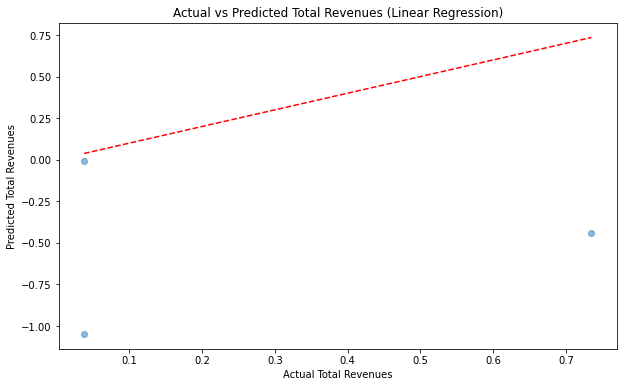

In [0]:
# Adding predicted values to X_test for visualization
X_test_copy = X_test.copy()
X_test_copy['Predicted_Revenues'] = y_pred

# Plot Actual vs Predicted Revenues
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Total Revenues')
plt.ylabel('Predicted Total Revenues')
plt.title('Actual vs Predicted Total Revenues (Linear Regression)')
plt.show()



A visualization always helps in understanding model performance beyond just numeric metrics. Here, we create a scatter plot that compares actual versus predicted revenues. Each point represents an actual vs. predicted pair, while the red dashed line represents a perfect prediction. If our points fall close to this line, it suggests our model is predicting accurately. This plot provides an intuitive way to assess how well our linear regression model is performing on the test data.

## Update Dataset with Predicted Values

In [0]:
# Adding predictions to the entire DataFrame
# Predict on the entire dataset to fill in all rows with predicted revenue values.
df_ml_pandas['Predicted_Revenues'] = linear_model.predict(X)

# Convert updated DataFrame back to Spark DataFrame
df_ml_spark_updated = spark.createDataFrame(df_ml_pandas)

# Save updated DataFrame as a CSV and as a Spark table
output_csv_path = "/dbfs/tmp/williams_finops_results.csv"
df_ml_spark_updated.write.mode("overwrite").option("header", True).csv(output_csv_path)
df_ml_spark_updated.write.option("mergeSchema", "true").mode('overwrite').saveAsTable("williams_finops_results")

# Display the Pandas DataFrame to enable manual download as CSV
display(df_ml_pandas)





Total_revenues,Depreciation_and_amortization_expenses,Interest_expense,Net_income_loss,YoY_Revenue_Growth,YoY_Net_Income_Growth,Depreciation_Percent_Revenue,Interest_Expense_Percent_Revenue,Revenue_Lag_1,Net_Income_Lag_1,Revenue_Rolling_Avg_3Y,Profit_Margin_Lag_1,Predicted_Revenues
0.03778128430272551,1.2392742933410297,-0.40824829046386296,1.1322186915590091,0.3239811392994783,0.6219509228095992,1.239003766026342,-0.40824829046386296,-2.4494294581490776,-2.119858521601519,0.4064175806077414,-2.1137133152146377,0.03778128430272507
0.03778128430272551,-0.8644199569096855,-0.40824829046386296,1.1322186915590091,0.3239811392994783,0.6219509228095992,-0.864971912871599,-0.40824829046386296,0.4006603019738179,0.8944864278418221,-2.448687368523556,0.898116014298968,0.03778128430272553
0.03778128430272551,-0.8644199569096855,-0.40824829046386296,1.1322186915590091,0.3239811392994783,0.6219509228095992,-0.864971912871599,-0.40824829046386296,0.4006603019738179,0.8944864278418221,0.39884643544270687,0.898116014298968,0.037781284302725364
0.7350177127985357,1.1947896263848412,-0.40824829046386296,-0.6991850254059968,0.7967726843359316,-1.8944346425985956,1.1652206393074998,-0.40824829046386296,0.4006603019738179,0.8944864278418221,0.41398872577277457,0.898116014298968,0.7350177127985354
0.7350177127985357,-0.8644199569096855,2.4494897427831783,-0.6991850254059968,0.3239811392994783,0.6219509228095992,-0.864971912871599,2.449489742783178,0.41581618407587423,-0.1878669206413153,0.4291310161028408,-0.19354490922742154,0.7350177127985358
0.7350177127985357,-0.8644199569096855,-0.40824829046386296,-0.6991850254059968,0.3239811392994783,0.6219509228095992,-0.864971912871599,-0.40824829046386296,0.41581618407587423,-0.1878669206413153,0.4442733064329085,-0.19354490922742154,0.7350177127985356
-2.3183969913038056,1.0236159079128722,-0.40824829046386296,-1.2991009984590363,-2.4166783808333236,-1.2153199714494,1.0556632461525548,-0.40824829046386296,0.41581618407587423,-0.1878669206413153,0.3560303041645862,-0.19354490922742154,-2.318396991303805


In this final step, we ensure that our dataset is updated with the predictions made during training. The column Predicted_Revenues is initialized with NaN values, and then we update these values with predictions from our test data. This results in a more comprehensive dataset where both actual and predicted values are side-by-side, making it easier for downstream analysis. We then save this updated DataFrame to both a CSV file and a Spark table. Finally, we display it for easy access, such as manual downloads or visualizing in a tool like Power BI. This makes it particularly useful for stakeholders looking to gain insights or conduct further analysis on predicted versus actual revenues.

## Next Steps for Power BI Visualization

The next step in this project is to create an interactive Power BI dashboard that will effectively communicate the results and insights obtained from our analysis. The dashboard will include three main pages, each serving a specific purpose. The Overview Page will provide a high-level summary of the company's financial health, with key metrics such as revenue, profit, and growth rates highlighted. The Revenue & Profitability Trends Page will give more detailed insights, including historical trends and the forecasted metrics derived from our machine learning models. Finally, the Feature Impact & Model Insights Page will focus on the features that had the most significant impact on the predictions, providing business users with a better understanding of what drives financial performance. The overall goal is to make these insights actionable and easy to interpret, so decision-makers can leverage this data for strategic financial planning.

This concludes the machine learning analysis part of the project. The focus will now shift towards effectively communicating these results in a visual form using Power BI to provide stakeholders with actionable insights into the financial health and optimization possibilities for the business.